# Alura - Data Science - Analisis de Datos con Python

### Dia 2
Objetivos:
1. Elegir y crear el grafico que mejor se adapte a precio por m2 por barrio.
2. Modificar el histograma de la clase y filtrar solo por 3 tipos de inmuebles.
3. Refinar el gráfico: Títulos, labels, etc.

## 1. Importacion de librerias necesarias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Cargar CSV

**Nota:** Los siguientes pasos son una reiteración del Notebook anterior.

In [2]:
# Load Dataset
df = pd.read_csv('Data/inmuebles_bogota.csv')

## 3. Limpieza del dataset

### 3.1 Renombrar columnas a palabras sin acentos

In [3]:
rename_columns = {'Baños':'Banos', 'Área':'Area'}
df.rename(columns=rename_columns, inplace=True)

### 3.2 Eliminacion de caracteres especiales y cambio de tipo a la columan **Valor**

In [4]:
df['Precio'] = df['Valor'].str.split(expand=True)[1]
df['Precio'] = df['Precio'].str.replace('.', '')
# Variable en millones
df['Precio'] = df['Precio'].astype(float) / 1000000

## 4. Información general

In [5]:
df.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio
951,Apartamento,Apartamento en venta en Usaquén,1,2,52,Usaquén,Usaquén,$ 330.000.000,330.0
1011,Apartamento,Apartamento en venta en Kennedy,2,1,34,Kennedy,Kennedy Central,$ 113.000.000,113.0
2608,Casa,Casa en venta en Zona Noroccidental,4,7,324,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.500.000.000,2500.0
6416,Apartamento,Apartamento en venta en El Batán,2,2,50,El Batán,La Alhambra,$ 310.000.000,310.0
2656,Apartamento,Apartamento en venta en Pontevedra,3,3,110,Pontevedra,La Floresta,$ 540.000.000,540.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Banos         9520 non-null   int64  
 4   Area          9520 non-null   int64  
 5   Barrio        9520 non-null   object 
 6   UPZ           9478 non-null   object 
 7   Valor         9520 non-null   object 
 8   Precio        9520 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 669.5+ KB


In [7]:
df.describe()

,Habitaciones,Banos,Area,Precio
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [8]:
df.describe()

,Habitaciones,Banos,Area,Precio
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


## 5. Ejercicio en clase

### Que es un histograma?
Un histograma nos permite entender la distribucion de frecuencia de una variable (Precio del inmueble). 


#### Que son los bins en un histograma?
Son intervalos o divisiones en los que se agrupan los datos para representar la distribución de frecuencia de una variable.

A mayor bins obtenemos:

**Mayor detalle:** Un número alto de bins puede revelar detalles finos en la distribución de datos, especialmente cuando tienes una gran cantidad de datos y deseas observar pequeñas variaciones.

**Menos legible:** Un histograma con muchos bins puede volverse difícil de leer y visualmente abrumador, especialmente si los datos tienen ruido o fluctuaciones menores.

**Sensibilidad al ruido:** Puede hacer que la distribución parezca más ruidosa de lo que realmente es, ya que los pequeños cambios pueden dar la impresión de una variación significativa.

**Pérdida de patrones generales:** Un número excesivo de bins puede ocultar patrones generales en los datos, ya que se centra en detalles minuciosos.



<Axes: ylabel='Frequency'>

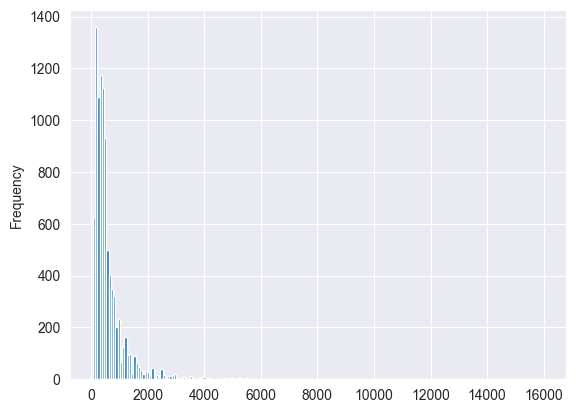

In [9]:
df['Precio'].plot.hist(bins=200)

A menor bins obtenemos:

**Simplificación:** Un número bajo de bins simplifica la visualización, lo que facilita la identificación de tendencias generales y patrones en los datos.

**Más estable:** La reducción de bins puede suavizar la representación, haciendo que los datos sean menos sensibles al ruido y a las fluctuaciones menores.

**Interpretación más sencilla:** Los histogramas con menos bins suelen ser más fáciles de interpretar, especialmente para audiencias no técnicas.

**Pérdida de detalle:** Un número bajo de bins puede ocultar detalles importantes en la distribución de los datos, lo que puede ser problemático si necesitas analizar diferencias más sutiles.

**Menos precisión:** Puedes perder precisión al agrupar datos en bins más grandes, lo que puede ser problemático si necesitas resultados precisos.

<Axes: ylabel='Frequency'>

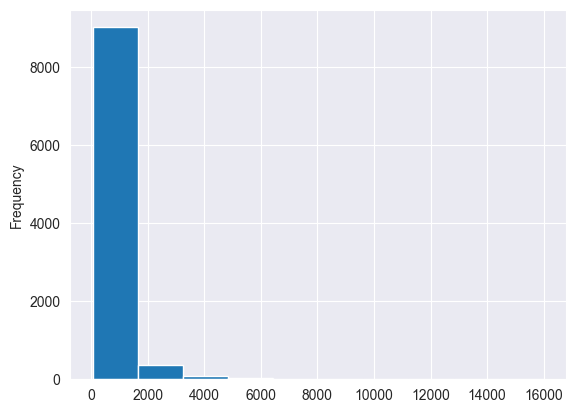

In [10]:
df['Precio'].plot.hist(bins=10)

En resumen, la elección entre una cantidad alta o baja de bins en un histograma depende de tus objetivos y de la naturaleza de tus datos. Debes considerar la cantidad de datos disponibles, la claridad de la presentación y la necesidad de detectar detalles o patrones generales al tomar esta decisión. En muchos casos, se recomienda experimentar con diferentes cantidades de bins para determinar cuál ofrece la mejor representación de tus datos.

<Axes: ylabel='Frequency'>

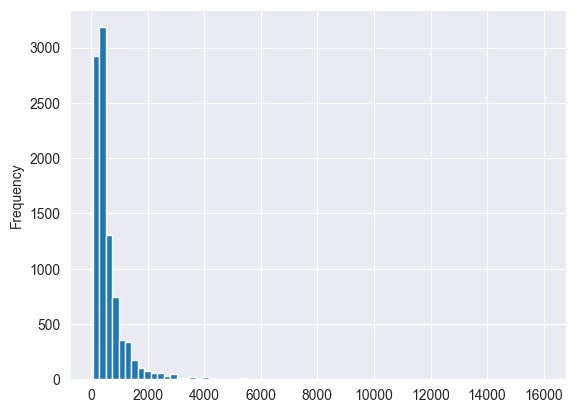

In [11]:
df['Precio'].plot.hist(bins=70)

Usando seaborn como alternativa a plt de pandas.

E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


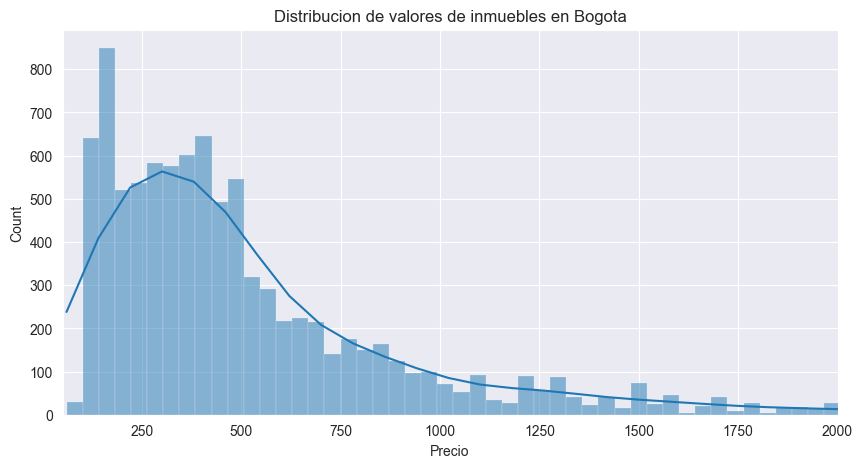

In [12]:
plt.figure(figsize=(10,5))
fig = sns.histplot(data=df, x='Precio', kde=True)
fig.set_title("Distribucion de valores de inmuebles en Bogota")
plt.xlim(50, 2000)
plt.show()

Y si quiero saber que tipo de inmuebles son?
Hacemos uso del parametro **Hue**, se utiliza para agregar un nivel adicional de información visual a un gráfico, permitiéndo representar y distinguir datos de diferentes categorías mediante la asignación de colores.

Al limitar los rangos con **plt.ylim()** es como si realizaramos un **zoom-in** ya que nuestro dataset esta principalmente constituido de tipos de apartamentos, con lo cual los demas se ven **"ocultados**".

E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

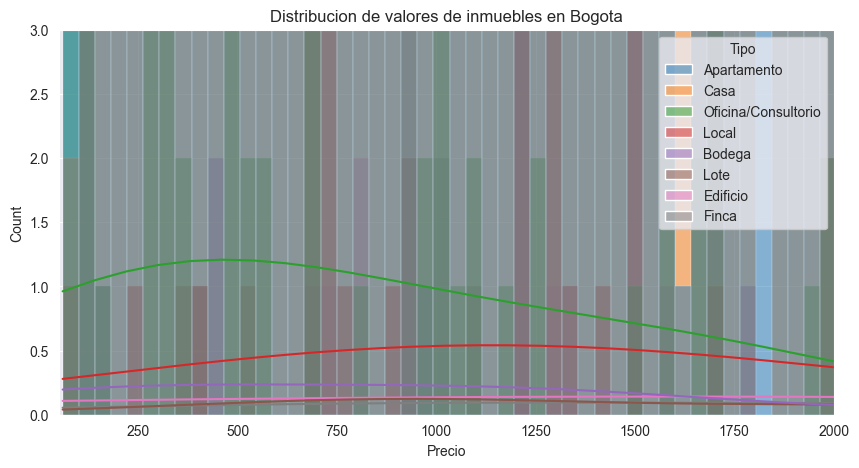

In [13]:
plt.figure(figsize=(10,5))
fig = sns.histplot(data=df, x='Precio', kde=True, hue='Tipo')
fig.set_title("Distribucion de valores de inmuebles en Bogota")
plt.xlim(50, 2000)
plt.ylim(0, 3)
plt.show()

## 6. Objetivos

### 6.1 Grafico - Precio de metro cuadrado por barrio.

Tenemos que obtener el precio por metro cuadrado por cada barrio.
- Dividimos el precio por el area.
Obtener un promedio del precio.
- Agrupamos por barrio y obtenemos el promedio con la funcion **mean()** y ordenamos nuestros valores
Graficarlo.
- Usamos seaborn para realizar nuestra grafica.

In [14]:
df['Precio_Metro_cuadrado'] = df['Precio'] / df['Area']

In [15]:
mean_price_m2 = df.groupby('Barrio')['Precio_Metro_cuadrado'].mean()

In [16]:
mean_price_m2

Barrio
Alameda               5.979381
Alhambra              4.326836
Andes Norte           6.050350
Antonio Nariño        3.530638
Barrancas             4.415957
                        ...   
Villa Maria           2.044511
Villas De Granada     3.168840
Villemar              3.989697
Zona Franca           2.962963
Zona Noroccidental    4.617059
Name: Precio_Metro_cuadrado, Length: 149, dtype: float64

In [17]:
df

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio,Precio_Metro_cuadrado
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,5.142857
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.00,3.941176
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.00,7.777778
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.00,5.779221
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.00,7.578125
...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,290.00,4.142857
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,670.00,6.700000
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,900.00,2.349869
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,335.00,1.830601


In [18]:
df['Precio_Metro_cuadrado']

0       5.142857
1       3.941176
2       7.777778
3       5.779221
4       7.578125
          ...   
9515    4.142857
9516    6.700000
9517    2.349869
9518    1.830601
9519    2.788269
Name: Precio_Metro_cuadrado, Length: 9520, dtype: float64

**Nota:** Seaborn nos muestra algo conocido como "bota" (whisker). Este elemento se agrega a los gráficos de barras cuando se utiliza la función **sns.barplot** para indicar la variabilidad en los datos.

 La bota generalmente muestra el intervalo de confianza del 95%, lo que significa que el 95% de las veces, la verdadera media se encuentra dentro de ese intervalo.



E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


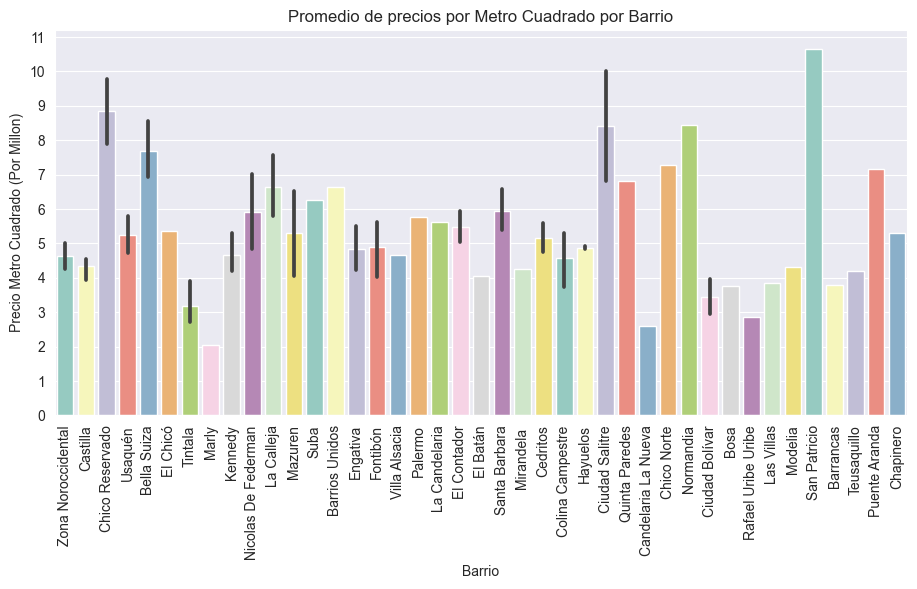

In [19]:
plt.figure(figsize=(11,5))
sns.barplot(data=df.head(200), x='Barrio', y='Precio_Metro_cuadrado', palette='Set3')
plt.xlabel('Barrio')
plt.ylabel('Precio Metro Cuadrado (Por Millon)')
plt.title('Promedio de precios por Metro Cuadrado por Barrio')
plt.xticks(rotation=90)
plt.yticks(range(0, 12))
plt.show()

### Correcion del ejercicio

Originalmete obtuvimos la media de la media como resultado en la variable **mean_price_m2** pero realizar esto no es lo correcto, para solucionarlo hacemos lo siguiente:

1. Agrupamos los valores por barrio.
2. Sumamos todos los valores.
3. Obtenemos el precio por metro cuadrado dividiendo el total de la suma de todos los precios por barrio y lo dividimos por la suma total del area.

In [20]:
sum_price_m2 = df.groupby('Barrio').sum()

In [21]:
sum_price_m2['Precio_Metro_cuadrado'] = sum_price_m2['Precio'] / sum_price_m2['Area']

In [22]:
mean_price_m2

Barrio
Alameda               5.979381
Alhambra              4.326836
Andes Norte           6.050350
Antonio Nariño        3.530638
Barrancas             4.415957
                        ...   
Villa Maria           2.044511
Villas De Granada     3.168840
Villemar              3.989697
Zona Franca           2.962963
Zona Noroccidental    4.617059
Name: Precio_Metro_cuadrado, Length: 149, dtype: float64

In [23]:
sum_price_m2['Precio_Metro_cuadrado']

Barrio
Alameda               5.979381
Alhambra              3.951189
Andes Norte           5.683066
Antonio Nariño        2.816232
Barrancas             4.474834
                        ...   
Villa Maria           1.944671
Villas De Granada     3.260171
Villemar              3.951590
Zona Franca           2.962963
Zona Noroccidental    4.572009
Name: Precio_Metro_cuadrado, Length: 149, dtype: float64

In [24]:
m2 = dict(sum_price_m2['Precio_Metro_cuadrado'])

In [25]:
df['Precio_Metro_cuadrado'] = df['Barrio']
df['Precio_Metro_cuadrado'] = df['Precio_Metro_cuadrado'].map(m2)

df.head(20)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio,Precio_Metro_cuadrado
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.0,4.572009
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.0,3.403589
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.0,8.104487
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.0,5.655581
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.0,6.290551
5,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000,510.0,6.290551
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 500.000.000,500.0,6.290551
7,Apartamento,Apartamento en venta en Bella Suiza,3,4,212,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 2.350.000.000,2350.0,6.290551
8,Apartamento,Apartamento en venta en El Chicó,3,2,159,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000,850.0,7.648045
9,Apartamento,Apartamento en venta en Bella Suiza,2,2,80,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 642.000.000,642.0,6.290551


E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


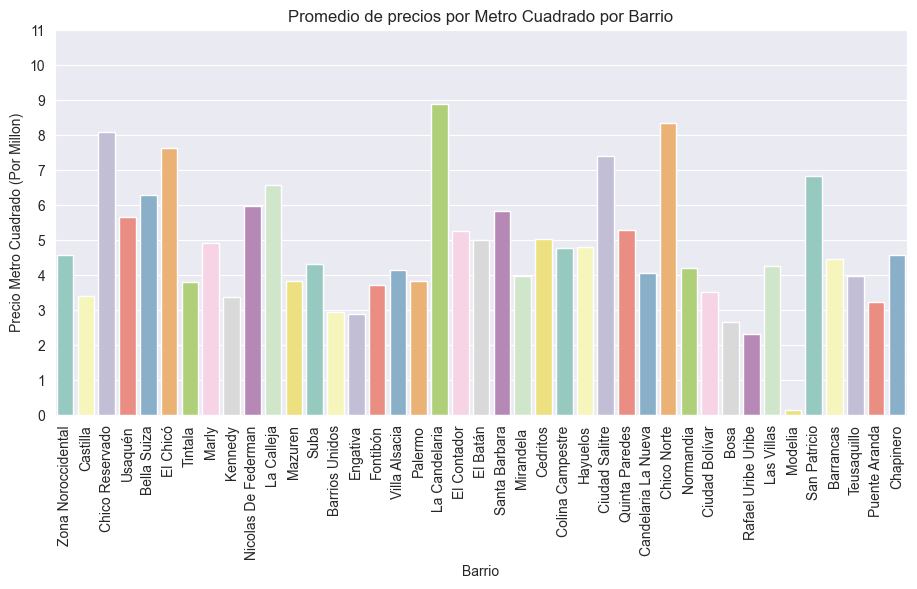

In [26]:
plt.figure(figsize=(11,5))
sns.barplot(data=df.head(200), x='Barrio', y='Precio_Metro_cuadrado', palette='Set3')
plt.xlabel('Barrio')
plt.ylabel('Precio Metro Cuadrado (Por Millon)')
plt.title('Promedio de precios por Metro Cuadrado por Barrio')
plt.xticks(rotation=90)
plt.yticks(range(0, 12))
plt.show()

### 6.2 Filtrar histograma por tipos de inmuebles


E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

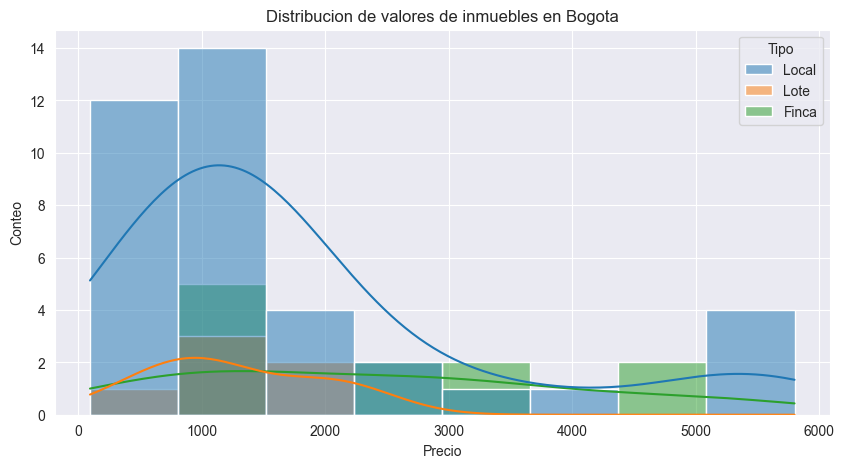

In [27]:
Tipos = ['Finca', 'Lote', 'Local']

df_filter = df[df['Tipo'].isin(Tipos)]

plt.figure(figsize=(10,5))
fig = sns.histplot(data=df_filter, x='Precio', kde=True, hue='Tipo')
fig.set_title("Distribucion de valores de inmuebles en Bogota")
plt.xlabel('Precio')
plt.ylabel('Conteo')
plt.show()